In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

In [2]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 23.8 MB/s eta 0:00:00


In [3]:
import konlpy.tag
from collections import Counter

In [4]:
okt = konlpy.tag.Okt()

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/쿠키닷컴/성지순례 댓글 분석-중복제거.csv", encoding="utf-8")

In [6]:
df

,Unnamed: 0,date,year,prep
0,1,2001-07-17,2001,복숭아 송료 포함 가격
1,2,2001-07-17,2001,정추영 재미없다
2,3,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,4,2001-07-17,2001,안사 안사
4,5,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...,...
19376,19377,2022-11-22,2022,ParticleEffe 색스
19377,19378,2022-11-22,2022,NaN
19378,19379,2022-11-25,2022,성지순례 왔습니다
19379,19380,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [8]:
df.dropna()

,Unnamed: 0,date,year,prep
0,1,2001-07-17,2001,복숭아 송료 포함 가격
1,2,2001-07-17,2001,정추영 재미없다
2,3,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,4,2001-07-17,2001,안사 안사
4,5,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...,...
19375,19376,2022-11-14,2022,헉
19376,19377,2022-11-22,2022,ParticleEffe 색스
19378,19379,2022-11-25,2022,성지순례 왔습니다
19379,19380,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [9]:
df=df[['date', 'year', 'prep']]
df

,date,year,prep
0,2001-07-17,2001,복숭아 송료 포함 가격
1,2001-07-17,2001,정추영 재미없다
2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,2001-07-17,2001,안사 안사
4,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...
19376,2022-11-22,2022,ParticleEffe 색스
19377,2022-11-22,2022,NaN
19378,2022-11-25,2022,성지순례 왔습니다
19379,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [10]:
df.rename(columns = {'prep':'text'}, inplace=True)
df

<ipython-input-10-79d7090f3218>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'prep':'text'}, inplace=True)


,date,year,text
0,2001-07-17,2001,복숭아 송료 포함 가격
1,2001-07-17,2001,정추영 재미없다
2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,2001-07-17,2001,안사 안사
4,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...
19376,2022-11-22,2022,ParticleEffe 색스
19377,2022-11-22,2022,NaN
19378,2022-11-25,2022,성지순례 왔습니다
19379,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [18]:
df = df.dropna()
df

,date,year,text
0,2001-07-17,2001,복숭아 송료 포함 가격
1,2001-07-17,2001,정추영 재미없다
2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,2001-07-17,2001,안사 안사
4,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...
19375,2022-11-14,2022,헉
19376,2022-11-22,2022,ParticleEffe 색스
19378,2022-11-25,2022,성지순례 왔습니다
19379,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


Text를 전처리해서 새로운 컬럼에 집어 넣어야

In [19]:
def clstr(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub(r'[0-9]', '', text)  # 숫자제거
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    text = re.sub('\n', '.', string=text)
    return text  

In [13]:
clstr(df['text'].loc[0])

'복숭아 송료 포함 가격'

불용어 처리

In [14]:
stopws = ['의', '여', '조', '몇', '개', '사', '주', '상', '단', '랑', '년', '인', '엔', '래', '써', \
          '초', '걸', '동', '등', '짱', '더', '서', '넌', '못', '면', '군', '닷', '적', '응', '원', \
          '기', '난', '나', '님', '네', '왜', '끝', '눈', '만', '나도', '시', '종', '징', '데', '참', \
          '운', '미', '입니다', '깔', '고', '것', '워', '라', '가', '이', '은', '들', '는', '좀', '잘', \
          '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '을', '이다', '게', '있다', \
          '되다', '다', '대', '현', '내', '노', '중', '아', '제', '요', '없다', '거', '안', '수', '저', \
          '하', '에서', 'ㅡ', '야', '이오', '되게', 'ㅋㅋㅋ', '지금', '위', '거', '이제', '전', '맛', \
          '번', '어디', '다시', '일', '집', '알', '글', '혹시', '정말', '여기', '꼭', '하나', '이상', \
          '짜', '허이', '허', '월', '해', '두', '_', '분', '로', '옆', '저', '제']

In [15]:
text = clstr(df['text'].loc[0])

wt = okt.morphs(text)
resu = []
for word in wt:
  if word not in stopws:
    resu.append(word)

print(resu)

['복숭아', '송료', '포함', '가격']


In [25]:
df['text'].loc[19380]

'성지순례'

In [30]:
df=df.reset_index()

In [31]:
df

,index,date,year,text
0,0,2001-07-17,2001,복숭아 송료 포함 가격
1,1,2001-07-17,2001,정추영 재미없다
2,2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니
3,3,2001-07-17,2001,안사 안사
4,4,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...,...
19174,19375,2022-11-14,2022,헉
19175,19376,2022-11-22,2022,ParticleEffe 색스
19176,19378,2022-11-25,2022,성지순례 왔습니다
19177,19379,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [32]:
df['text'].loc[19178]

'성지순례'

In [33]:
res = []
for i in range(0, 19179):
  text = df['text'].loc[i]
  text = clstr(text)
  wts = okt.morphs(text)
  co = []
  for wt in wts:
    if wt not in stopws:
       co.append(wt)
  res.append(co)

res

[['복숭아', '송료', '포함', '가격'],
 ['정추영', '재미없다'],
 ['재밋스신', '분이시네요', '한참', '웃엇습', '니'],
 ['안사', '안사'],
 ['삼', '하게', '그대로', '찍지', '뜯어', '먹고', '찍었네', '가여'],
 ['가진', '칙촉', '이랑', '교환', '하죠', '추가', '금', '포함'],
 ['adside', '오래된', '산도', '교환', '안될까', '메일', '주세요', '수입'],
 ['이씨', '육갑', '떨어요'],
 ['박한이', '쩜', '싸게', '않', '될까'],
 ['동참', '메일', '보냈습니다'],
 ['누', '비리', '우리', '한번', '쓴거', '빡스', '있는데', '개당', '내놓죠'],
 ['복숭아',
  '개당',
  '리퍼',
  '제품',
  '코코넛',
  '빠졌거나',
  '까맣게',
  '탄일',
  '겁니다',
  '정품',
  '그',
  '가격',
  '나오기',
  '힘들죠'],
 ['AM', '초코', '칩', '쿠키', '어케', '안될까'],
 ['earman',
  '이런',
  '건',
  '매매',
  '란',
  '올리셔야',
  '하는',
  '아닌가요',
  '아니군요',
  '거기',
  '올리면',
  '욕먹겠군요'],
 ['earman', '첨', '팔려는', '카메라', '찍은', '샘플', '줄', '알았어요'],
 ['남대문', '새것도', '이면', '삽니다', '내리셔', '야할듯'],
 ['케이스', '종이컵', '따로', '파시는면', '많이', '받을수', '있겠'],
 ['살구', '오늘', '사신거', '맞나여', '그럼', '사신데서', '교환', '이나', '환불', '될텐데여'],
 ['turbout', '포장', '띁으셔', '환불', '힘들듯', '하네요'],
 ['mm', '연락', '주세요', '삽니다'],
 ['단종', '된다', '말', '있어서', '그런지', '요새', '매

In [34]:
df['prep']=res
df

,index,date,year,text,prep
0,0,2001-07-17,2001,복숭아 송료 포함 가격,"[복숭아, 송료, 포함, 가격]"
1,1,2001-07-17,2001,정추영 재미없다,"[정추영, 재미없다]"
2,2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습니,"[재밋스신, 분이시네요, 한참, 웃엇습, 니]"
3,3,2001-07-17,2001,안사 안사,"[안사, 안사]"
4,4,2001-07-17,2001,삼하게 그대로 찍지 뜯어 먹고 찍었네 가여,"[삼, 하게, 그대로, 찍지, 뜯어, 먹고, 찍었네, 가여]"
...,...,...,...,...,...
19174,19375,2022-11-14,2022,헉,[헉]
19175,19376,2022-11-22,2022,ParticleEffe 색스,"[ParticleEffe, 색스]"
19176,19378,2022-11-25,2022,성지순례 왔습니다,"[성지순례, 왔습니다]"
19177,19379,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...,"[최초, 성지, 순례, 왔습니다, 이번, 친, jlpt, n, 급, 최소, 점, 나..."


In [35]:
df = df[['date', 'year', 'prep']]
df

,date,year,prep
0,2001-07-17,2001,"[복숭아, 송료, 포함, 가격]"
1,2001-07-17,2001,"[정추영, 재미없다]"
2,2001-07-17,2001,"[재밋스신, 분이시네요, 한참, 웃엇습, 니]"
3,2001-07-17,2001,"[안사, 안사]"
4,2001-07-17,2001,"[삼, 하게, 그대로, 찍지, 뜯어, 먹고, 찍었네, 가여]"
...,...,...,...
19174,2022-11-14,2022,[헉]
19175,2022-11-22,2022,"[ParticleEffe, 색스]"
19176,2022-11-25,2022,"[성지순례, 왔습니다]"
19177,2022-12-05,2022,"[최초, 성지, 순례, 왔습니다, 이번, 친, jlpt, n, 급, 최소, 점, 나..."


In [36]:
okt.morphs(' '.join(s for s in df['prep'].loc[19177]))

['최초',
 '성지',
 '순례',
 '왔습니다',
 '이번',
 '친',
 'jlpt',
 'n',
 '급',
 '최소',
 '점',
 '나와서',
 '과락없',
 '합격',
 '할',
 '있게',
 '해주세요']

In [37]:
pre =[]
for i in range(0, 19179):
  text = df['prep'].loc[i]
  text = ' '.join(s for s in text)
  pre.append(text)

df['prep']=pre
df

<ipython-input-37-c2b6355ff67a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep']=pre


,date,year,prep
0,2001-07-17,2001,복숭아 송료 포함 가격
1,2001-07-17,2001,정추영 재미없다
2,2001-07-17,2001,재밋스신 분이시네요 한참 웃엇습 니
3,2001-07-17,2001,안사 안사
4,2001-07-17,2001,삼 하게 그대로 찍지 뜯어 먹고 찍었네 가여
...,...,...,...
19174,2022-11-14,2022,헉
19175,2022-11-22,2022,ParticleEffe 색스
19176,2022-11-25,2022,성지순례 왔습니다
19177,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [ ]:
def dwc(origin_df, start_date, end_date):
    
    query = origin_df[(origin_df.date >= start_date) & (origin_df.date <= end_date)]
    
    q = query[['prep', 'date']].dropna()
    q.columns = ['text', 'date']
    # q2 = query[['Review Title', 'Date_Time']].dropna()    
    # q2.columns = ['Reviews', 'Date_Time']
    
    # q = q1.append(q2)
    q.index = range(len(q))
    
    # q['preprocess'] = q.textsum.apply(lambda text : " ".join(parser.morphs(text)))
    q['preprocess'] = q.text.apply(lambda text : " ".join(okt.morphs(text)))
    cnt = Counter(word for line in q.preprocess for word in line.split())
    print(len(q))
    
    font_path = '/content/NanumBarunGothic.ttf'
    wc = WordCloud(
                   font_path=font_path,
                   width=1200 , height=600,
                   background_color="white").generate_from_frequencies(cnt)

    plt.figure(figsize=(15,6))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [38]:
def fw(origin_df, start_date, end_date):
    
    query = origin_df[(origin_df.date >= start_date) & (origin_df.date <= end_date)]
    
    q = query[['prep', 'date']].dropna()
    q.columns = ['text', 'date']
    # q2 = query[['Review Title', 'Date_Time']].dropna()    
    # q2.columns = ['Reviews', 'Date_Time']
    
    # q = q1.append(q2)
    q.index = range(len(q))
    
    # q['preprocess'] = q.textsum.apply(lambda text : " ".join(parser.morphs(text)))
    q['preprocess'] = q.text.apply(lambda text : " ".join(okt.morphs(text)))
    cnt = Counter(word for line in q.preprocess for word in line.split())
    print(len(q))
    print(cnt)

In [ ]:
fw(df, '2001-01-01', '2002-07-31')

4814
Counter({'리플': 998, '쿠키': 614, '닷컴': 352, '아햏햏': 203, '까지': 201, '제품': 177, '복숭아': 155, '합니다': 145, '사람': 143, '지': 143, '가격': 141, '그': 132, '하고': 129, '오늘': 127, '니': 123, '연락': 123, '교환': 122, '아직': 117, '컴': 113, '진짜': 105, '이런': 104, '아직도': 99, '구입': 98, '구': 93, '계속': 91, '오': 90, '할': 88, '말': 88, '때': 85, '생각': 84, '달': 84, '하하': 84, '우리': 82, '시간': 82, '음': 82, '근데': 80, '마지막': 80, '롯데': 80, '넘': 78, '하는': 77, '많이': 77, '있습니다': 76, '사용': 75, '정도': 75, '해서': 72, '주세요': 69, '따': 66, '너무': 65, '과자': 65, '사랑': 65, '이나': 64, '또': 64, '물건': 64, '그거': 64, '냐': 64, '에게': 63, '뭐': 63, '한번': 62, '한테': 62, '인데': 61, '있는': 60, '그냥': 60, '판매': 60, '우': 57, '너': 56, '여러분': 56, '헉': 54, '정품': 54, '언제': 54, '사진': 54, '맨': 54, '번째': 54, '타짜': 54, '모두': 53, '돈': 53, '모델': 51, '된': 49, '염': 49, '요즘': 49, '보다': 49, '케이스': 48, '그럼': 48, '째': 48, '이야': 47, '곳': 46, '바랍니다': 46, '드립니다': 46, 'a': 46, '역사': 46, '바': 44, '칙촉': 43, '있는데': 43, '이렇게': 43, '살': 43, '얼마': 43, '후': 43, '인가': 43, '흠': 43,

4814


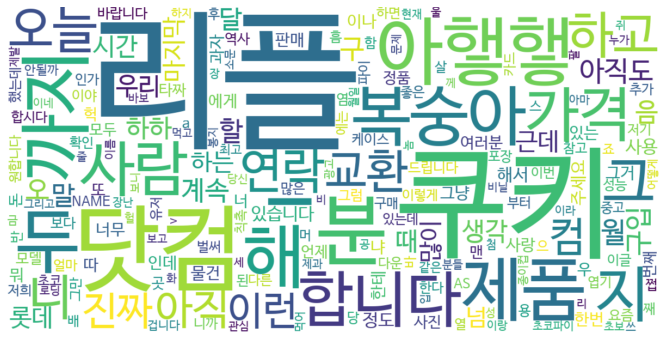

In [ ]:
dwc(df, '2001-01-01', '2002-07-31')

In [ ]:
fw(df, '2002-08-01', '2006-12-31')

10800
Counter({'리플': 2465, '성지순례': 1422, '쿠키': 972, '탁탁': 886, '닷컴': 625, '사랑': 566, '아햏햏': 515, '햏자': 453, '오': 424, '성지': 401, '만세': 386, '하고': 374, '역사': 356, '햏': 355, '오늘': 336, '대략': 335, '기네스': 318, '마지막': 305, '까지': 296, '지': 266, '로딩': 255, '순례': 253, '달': 252, '하하': 250, '어': 244, '아직도': 235, '컴': 231, '번째': 229, '문희준': 228, '똥': 222, '시간': 220, '계속': 218, '한다': 214, '그': 204, '왔': 201, '가오': 197, '압박': 196, '키보': 196, '아직': 194, '한번': 192, '사람': 190, '방법': 184, '오후': 183, '때': 183, '곳': 181, '따': 179, '째': 175, '월일': 173, '또': 164, '다감': 157, '이런': 153, '동참': 148, '말': 147, '아아': 146, '그만': 146, '왔다': 146, '했소': 145, '올': 143, '날': 142, '겔': 136, '아싸': 135, '박성민': 134, '디씨': 131, '소햏': 128, '우리': 127, 'NAME': 123, '컴터': 122, '기네스북': 122, '인가': 121, '허허': 119, '할': 119, '플': 118, '하는': 115, '니': 115, '오전': 115, '갑니다': 114, '보고': 113, '기념': 113, '완료': 113, '다운': 112, '모두': 110, '이글': 109, '역시': 108, '언제': 107, '음': 106, '본': 106, '다녀감': 104, '바보': 103, '하자': 103, '새벽': 102, '주

10800


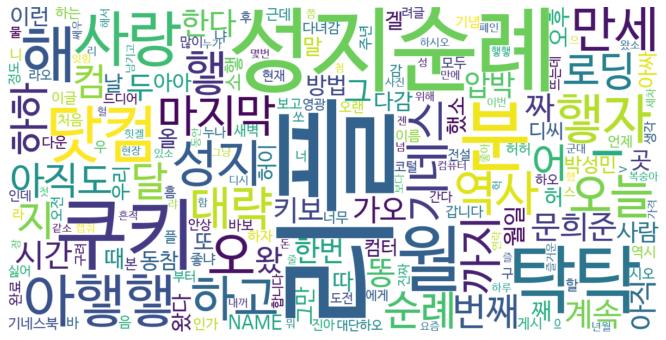

In [ ]:
dwc(df, '2002-08-01', '2006-12-31')

In [ ]:
fw(df, '2007-01-01', '2022-12-31')

3770
Counter({'해주세요': 4609, '성지순례': 4030, '성지': 833, '수능': 734, '합격': 581, '왔습니다': 575, '대박': 553, '생기': 553, '시험': 550, '성': 480, '어': 444, '꿀꿀': 410, '하게': 408, '로또': 388, '지방': 376, '보게': 375, '여자친구': 329, '붙게': 236, '가게': 236, '여친': 235, '쿠키': 229, '올해': 227, '아자': 208, '사랑': 188, '대박나게': 186, '순례': 176, '지': 172, '디시': 170, '사람': 158, '닷컴': 158, '많이': 157, '맞게': 156, '방어': 154, '등급': 153, '갤': 148, '터지게': 148, '올': 146, '주세요': 142, '플': 141, '받게': 141, '하는': 136, '성공하게': 136, '모든': 134, '좋은': 134, '오늘': 133, '빠삐놈': 131, '당첨': 129, '이번': 126, '리플': 124, '대학': 123, '곳': 121, '이랑': 111, '해주세': 108, '결혼': 101, '돈': 101, '하고': 99, '모두': 99, '제발': 97, 'A': 97, '기원': 96, '순': 94, '나오게': 94, '때': 93, '섹스': 93, '병신': 91, '된다': 91, '학점': 89, '있게': 88, '잘치게': 88, '에게': 86, '사귀게': 86, '점': 85, '수학': 85, '죄송합니다': 85, '장': 84, '역사': 84, '합니다': 84, '빠삐코': 84, '환': 83, '남친': 82, '허경영': 81, '무너진다': 81, '디씨': 80, '수시': 80, '가자만': 79, '꿈': 78, '내일': 78, '벌게': 78, '날': 76, '서울대': 76, '더크': 75, '해주세여'

3770


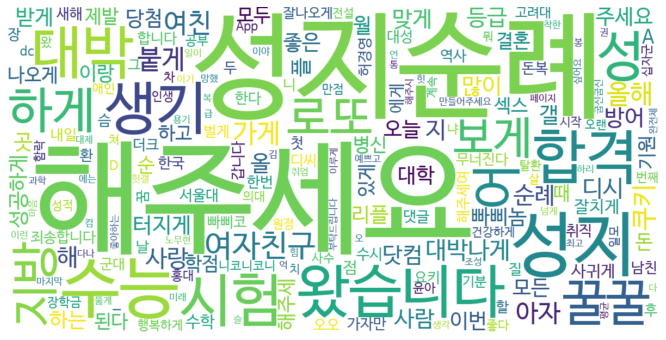

In [ ]:
dwc(df, '2007-01-01', '2022-12-31')

In [39]:
fw(df, '2001-01-01', '2001-12-31')
fw(df, '2002-01-01', '2002-12-31')
fw(df, '2003-01-01', '2003-12-31')
fw(df, '2004-01-01', '2004-12-31')
fw(df, '2005-01-01', '2005-12-31')
fw(df, '2006-01-01', '2006-12-31')
fw(df, '2007-01-01', '2007-12-31')
fw(df, '2008-01-01', '2008-12-31')
fw(df, '2009-01-01', '2009-12-31')
fw(df, '2010-01-01', '2010-12-31')
fw(df, '2011-01-01', '2011-12-31')
fw(df, '2012-01-01', '2012-12-31')
fw(df, '2013-01-01', '2013-12-31')
fw(df, '2014-01-01', '2014-12-31')
fw(df, '2015-01-01', '2015-12-31')
fw(df, '2016-01-01', '2016-12-31')
fw(df, '2017-01-01', '2017-12-31')
fw(df, '2018-01-01', '2018-12-31')
fw(df, '2019-01-01', '2019-12-31')
fw(df, '2020-01-01', '2020-12-31')
fw(df, '2021-01-01', '2021-12-31')
fw(df, '2022-01-01', '2022-12-31')

3360
Counter({'리플': 677, '쿠키': 461, '닷컴': 243, '제품': 156, '복숭아': 140, '아직': 131, '사람': 125, '합니다': 118, '가격': 117, '그': 103, '연락': 101, '니': 100, '교환': 99, '하고': 98, '컴': 87, '오늘': 85, '진짜': 85, '구입': 82, '이런': 77, '롯데': 77, '구': 75, '말': 74, '할': 72, '생각': 71, '사용': 70, '많이': 67, '있습니다': 67, '넘': 67, '하는': 65, '때': 65, '근데': 65, '음': 63, '우리': 62, '계속': 62, '정도': 61, '해서': 60, '과자': 59, '하하': 59, '사랑': 57, '인데': 55, '시간': 54, '판매': 54, '그거': 53, '물건': 52, '따': 52, '뭐': 52, '주세요': 50, '정품': 50, '이나': 50, '또': 50, '너무': 49, '돈': 49, '그냥': 48, '달': 48, '한테': 47, '있는': 47, '모델': 47, '에게': 47, '마지막': 47, '한번': 46, '맨': 46, '사진': 45, '너': 45, '여러분': 44, '냐': 44, '염': 42, '그럼': 41, '곳': 41, '헉': 41, '요즘': 41, '모두': 40, '바랍니다': 40, '드립니다': 40, '케이스': 39, '다른': 39, '칙촉': 38, '있는데': 38, '이야': 38, '오': 37, '보다': 37, '바': 37, '우': 36, '언제': 36, '구매': 36, '카드': 36, '배': 36, '째': 36, '포장': 35, '유저': 35, '용': 35, '얼마': 35, '많은': 35, '된': 35, '이글': 35, '초코': 34, '이번': 34, '저희': 34, '죠': 34, '니까': 34,

In [48]:
df_1=df.loc[0:1999]
df_2=df.loc[2000:3999]
df_3=df.loc[4000:5999]
df_4=df.loc[6000:7999]
df_5=df.loc[8000:9999]
df_6=df.loc[10000:11999]
df_7=df.loc[12000:13999]
df_8=df.loc[14000:15999]
df_9=df.loc[16000:17999]
df_10=df.loc[18000:19178]

In [71]:
df_10

,date,year,prep
18000,2014-08-14,2014,BBB 성지순례 왔습니다 로또 해주세요
18001,2014-08-15,2014,aa 성지순례 왔습니다
18002,2014-08-17,2014,댓글 많네 봐도 명작 마치 중고나라 세태 꼬집는듯
18003,2014-08-17,2014,roadstone 미래 왔습니다 한국 과자 넘어가고 질소 채워 넣는답니다
18004,2014-08-19,2014,꾸에 엘 성지순례 왔습니다 부디 머리 아픈 거래처 한번 쏵 정리 해주세요
...,...,...,...
19174,2022-11-14,2022,헉
19175,2022-11-22,2022,ParticleEffe 색스
19176,2022-11-25,2022,성지순례 왔습니다
19177,2022-12-05,2022,최초 성지 순례 왔습니다 이번 친 jlpt n 급 최소 점 나와서 과락없 합격 할 ...


In [53]:
fw(df_1, '2001-01-17', '2001-08-29')

2000
Counter({'리플': 380, '쿠키': 307, '닷컴': 167, '제품': 128, '복숭아': 100, '사람': 94, '가격': 91, '합니다': 88, '그': 78, '니': 70, '구입': 70, '하고': 70, '교환': 69, '연락': 68, '롯데': 65, '구': 58, '생각': 58, '컴': 55, '있습니다': 52, '할': 51, '근데': 51, '진짜': 51, '오늘': 49, '말': 49, '이런': 48, '과자': 48, '판매': 46, '아직': 46, '정품': 45, '하는': 45, '음': 45, '정도': 45, '넘': 45, '사용': 42, '너무': 42, '때': 42, '물건': 40, '그거': 40, '해서': 40, '많이': 39, '우리': 38, '이나': 37, '한테': 37, '돈': 37, '그냥': 36, '모델': 36, '사진': 36, '맨': 36, '있는': 35, '따': 35, '에게': 35, '인데': 35, '주세요': 33, '계속': 33, '뭐': 32, '카드': 32, '케이스': 31, '그럼': 31, '시간': 31, '요즘': 31, '있는데': 30, '다른': 30, '파이': 30, '냐': 30, '칙촉': 29, '유저': 29, '중고': 29, '염': 29, '바랍니다': 29, '모두': 28, '제과': 28, '한번': 27, '포장': 27, '또': 27, '너': 27, '종이컵': 26, '헉': 26, 'AS': 26, '이번': 26, '된': 26, '그리고': 26, '드립니다': 26, '배': 26, '어떻게': 26, '분들': 25, '인가': 25, '죠': 25, '니까': 25, '확인': 25, '이라': 25, '사랑': 25, '안될까': 24, '곳': 24, '오': 24, '성능': 24, '벌써': 24, '에는': 24, '열': 24, '여러분': 24,

In [55]:
fw(df_2, '2001-08-29', '2002-05-11')

2000
Counter({'리플': 448, '쿠키': 206, '아직': 125, '닷컴': 105, '마지막': 58, '오늘': 57, '하하': 52, '진짜': 48, '하고': 46, '달': 46, '컴': 44, '연락': 44, '이런': 44, '계속': 44, '복숭아': 43, '교환': 42, '제품': 42, '니': 42, '합니다': 42, '사람': 39, '가격': 38, '사랑': 37, '시간': 34, '그': 34, '때': 33, '우리': 33, '말': 32, '또': 31, '많이': 31, '사용': 30, '여러분': 30, '언제': 29, '뭐': 27, '음': 27, '다운': 27, '이글': 26, '구': 26, '해서': 26, '주세요': 26, '정도': 25, '너': 25, '넘': 25, 'NAME': 25, '번째': 25, '할': 24, '한번': 24, '용': 24, '인데': 24, '하는': 23, '헉': 23, '합시다': 23, 'a': 23, '컴퓨터': 23, '구입': 22, '째': 22, '우': 22, '보다': 22, '로딩': 22, '따': 21, '물건': 21, '생각': 21, '흠': 21, '냐': 21, '오': 21, '컴터': 20, '곳': 20, '이야': 20, '그거': 20, '근데': 20, '그냥': 19, '원합니다': 19, '있습니다': 19, '드립니다': 19, '반': 19, '이름': 19, '있는': 19, '모두': 19, '너무': 19, '경매': 18, '홈런': 18, '제발': 18, '이나': 18, '첨': 18, '뜨는데': 18, '하면': 17, '이렇게': 17, '살': 17, '누가': 17, '함': 17, '저희': 17, '많은': 17, '추가': 17, '쩝': 17, '헐': 16, '에게': 16, '장난': 16, '외계인': 16, '과격': 16, '요즘': 15, '날'

In [57]:
fw(df_3, '2001-05-11', '2002-10-01')

2000
Counter({'리플': 462, '쿠키': 230, '아햏햏': 157, '닷컴': 153, '아직': 108, '햏자': 104, '역사': 83, '컴': 57, '오늘': 56, '방법': 50, '그': 49, '압박': 45, '시간': 44, '타짜': 41, '사람': 40, '오후': 38, '동참': 38, '월일': 37, '하고': 37, '마지막': 35, '왔다': 34, '니': 34, '계속': 34, '폐인': 33, '오': 32, '한번': 31, '할': 31, '햏': 29, '음': 28, '감': 28, '이런': 28, '달': 28, '우리': 27, '가격': 27, '에게': 26, '번째': 26, '하하': 25, '째': 25, '한다': 25, '쉬운': 24, '우': 24, '합니다': 24, '그만': 24, '새벽': 24, '사랑': 24, '연락': 23, '하는': 23, '모두': 23, '본': 23, '때': 22, '허허': 22, '말': 22, '주년': 22, '디씨': 21, '넘': 21, '또': 21, '교환': 20, '간다': 20, '줄': 20, '복숭아': 20, '주세요': 20, '뭐': 20, '느린': 19, 'NAME': 19, '언제': 19, '근데': 19, '냐': 19, '달리': 19, '너무': 19, '제품': 19, '이름': 19, '곳': 19, '생각': 19, '현장': 19, '쌔': 19, '헉': 19, '구': 18, '헤헤': 18, '후': 18, '해서': 18, '싸': 18, '현재': 18, '헿': 18, '득햏': 18, '보니': 17, '영광': 17, '다운': 17, 'ERROR': 17, '기념': 17, '구입': 17, '오전': 17, '헐': 17, '있소': 17, '케키': 16, 'a': 16, '바': 16, '시오': 16, '따': 16, '로딩': 16, '전설': 16, 

In [59]:
fw(df_4, '2002-10-01', '2003-02-08')

2000
Counter({'리플': 537, '쿠키': 192, '닷컴': 141, '햏자': 134, '아직': 80, '역사': 71, '아햏햏': 65, '마지막': 65, '오늘': 62, '로딩': 61, '햏': 54, '시간': 54, '계속': 53, '오후': 49, '컴': 46, '번째': 45, '달': 41, '감': 41, '미네랄': 41, '하고': 39, '압박': 39, '그': 38, '째': 37, '왔다': 37, '사랑': 36, '이런': 35, '본': 35, '말': 33, '한번': 33, 'NAME': 32, '사람': 31, '오': 30, '우': 30, '할': 30, '날': 30, '때': 30, '곳': 29, '인가': 29, '오전': 29, '또': 29, '가오': 29, '컴터': 29, '월일': 28, '라오': 28, '동참': 27, '니': 27, '많이': 27, '언제': 26, '레드': 25, '하시오': 24, '따': 24, '시오': 23, '다운': 23, '복숭아': 23, '디씨': 23, '드디어': 23, '쌔우': 23, '근데': 23, '득햏': 22, '좌': 22, '전설': 22, '있소': 21, '하는': 21, '하오': 21, '요즘': 20, '넘': 20, '소햏': 20, '방법': 20, '뜨는데': 19, '하하': 19, '바': 19, '너무': 19, '몇번': 19, '물': 19, '꼴등': 18, '보고': 18, '같소': 18, '처음': 18, '하겠소': 18, '허허': 18, '성지순례': 18, '새해': 18, '폐인': 17, '우리': 17, '했소': 17, '현재': 17, '흠': 17, '아싸': 17, '그리고': 17, '기념': 17, '우와': 17, '대단하오': 17, '싶소': 17, '쏘': 17, '냐': 17, '있는': 16, '반': 16, '된다': 16, '누가': 16, '젠

In [61]:
fw(df_5, '2003-02-08', '2003-05-17')

2000
Counter({'리플': 421, '쿠키': 109, '햏자': 106, '번째': 92, '햏': 88, '아직': 87, '닷컴': 78, '역사': 76, '로딩': 60, '성지순례': 58, '오늘': 55, '하고': 53, '사랑': 52, '아햏햏': 46, '째': 45, '압박': 44, '한번': 44, '왔다': 43, '그': 42, '곳': 37, '동참': 37, '성지': 37, '사람': 36, '대략': 36, '감': 35, '컴': 35, '말': 35, '오': 34, '이런': 34, '허허': 34, '시간': 33, '달': 33, '소햏': 31, '가오': 31, '플': 30, '때': 29, '하하': 29, '햏햏': 28, '마지막': 28, '본햏': 27, '또': 27, '날': 27, '바': 27, '폐인': 26, '향': 26, '장': 25, '남기고': 25, '전설': 24, '디씨': 24, '음': 23, 'NAME': 23, '대단하오': 23, '기념': 23, '계속': 23, '하오': 23, '방법': 23, '시오': 22, '이름': 22, '역시': 22, '하시오': 22, '스': 22, '아싸': 22, '복숭아': 22, '구': 21, '할': 21, '본': 21, '몇번': 21, '부터': 21, '에게': 20, '컴터': 20, '모두': 20, '올': 20, '현장': 20, '다운': 20, '있소': 19, '흠': 19, '오후': 19, '구려': 19, '우': 19, '누가': 19, '우리': 19, '뎅': 19, '기네스': 18, '싶소': 18, '하여': 18, '했소': 18, '랴': 18, '이글': 18, '인가': 18, '순례': 18, '찌게': 18, '너': 17, '함': 17, '월일': 17, '젠장': 17, '왔소': 17, '진짜': 17, '너무': 17, '크롤': 17, '득햏': 17,

In [64]:
fw(df_6, '2003-05-18', '2003-11-20')

2000
Counter({'리플': 401, '성지순례': 226, '대략': 168, '쿠키': 156, '성지': 107, '햏': 105, '닷컴': 104, '사랑': 84, '순례': 81, '역사': 81, '하고': 79, '아직': 75, '마지막': 62, '햏자': 61, '로딩': 57, '왔다': 55, '오늘': 52, '가오': 50, '감': 45, '때': 40, '계속': 39, '곳': 39, '그': 38, '소햏': 38, '압박': 38, '오후': 38, '시간': 35, '사람': 35, '아햏햏': 34, '디씨': 34, '이런': 34, '한번': 34, '또': 34, '쏘': 31, '한다': 31, '동참': 31, '사진': 30, '오전': 29, '오': 29, 'NAME': 28, '달': 28, '허허': 28, '방법': 28, '월일': 28, '번째': 27, '아싸': 26, '하는': 26, '흔적': 26, '모두': 25, '말': 25, '주년': 24, '역시': 23, '음': 23, '컴': 22, '할': 22, '대단하오': 21, '이글': 21, '날': 21, '하하': 21, '기념': 21, '다녀감': 21, '좆치': 20, '째': 19, '컴터': 19, '다운': 19, '드디어': 19, '우리': 19, '으': 19, '오랜': 19, '햏햏': 19, '현장': 19, '내년': 19, '언제': 19, '새벽': 19, '갑니다': 19, '구려': 18, '뷁': 18, '보고': 18, '이름': 18, '전설': 18, '친구': 18, '동안': 17, '감동': 17, '줄': 17, '간다': 17, '넘': 17, '따': 17, '권': 17, '리': 17, '에도': 17, '헉': 16, '생각': 16, '라오': 16, '너': 16, '랴': 16, '발자국': 16, '하루': 16, '너무': 16, '현재': 16, '왔

In [66]:
fw(df_7, '2003-11-20', '2004-08-02')

2000
Counter({'리플': 425, '성지순례': 401, '성지': 130, '쿠키': 90, '하고': 79, '오늘': 67, '아직': 64, '마지막': 63, '햏': 63, '대략': 62, '만세': 62, '감': 61, '순례': 61, '닷컴': 61, '사랑': 55, '왔다': 54, '햏자': 51, '오후': 47, '가오': 46, '컴': 41, '월일': 38, '압박': 37, '로딩': 36, '시간': 33, '또': 33, '때': 32, '달': 32, '바보': 32, '역사': 31, '기념': 31, '미친': 31, '오전': 30, '곳': 30, '계속': 30, '컴터': 29, '역시': 27, '아햏햏': 27, '한번': 27, '잇힝': 27, '사람': 26, '오': 26, '니': 26, '하하': 26, '토끼': 26, '퉤': 26, '말': 25, '보고': 25, '한다': 25, '처음': 24, '그': 24, '대단하오': 23, '디씨': 22, '많이': 22, '영광': 22, 'NAME': 22, '근데': 21, '소햏': 21, '갑니다': 21, '하는': 20, '째': 20, '첫': 20, '군대': 20, '새벽': 20, '스': 20, '만에': 20, '합니다': 20, '날': 20, '플': 20, '드디어': 19, '언제': 19, '흠': 19, '오랜': 19, '년월': 19, '번째': 19, '이런': 19, '우리': 18, '인가': 18, '남기고': 18, '허허': 18, '으': 18, '완료': 18, '랔햏': 18, '씨': 18, '다운': 17, '줄': 17, '왔': 17, '크롤': 17, '에게': 17, '왔소': 16, '부터': 16, '정도': 16, '시험': 16, '동참': 16, '음': 16, '타': 15, '아아': 15, '간다': 15, '기네스': 15, '뭐': 15, '인데':

In [68]:
fw(df_8, '2004-08-02', '2008-03-12')

2000
Counter({'성지순례': 678, '리플': 263, '성지': 172, '하고': 111, '순례': 100, '쿠키': 98, '사랑': 97, '하자': 87, '완료': 82, '아직': 71, '내꺼': 68, '캡춰': 66, '닷컴': 59, '갑니다': 58, '즐': 56, 'OTLOTL': 55, '디씨': 52, '플': 52, '오늘': 51, '개독교': 50, '왔다': 49, '컴': 49, '결혼': 48, '때': 47, '도전': 46, '누나': 44, '오랜': 43, '햏햏햏햏햏햏햏햏': 42, '그': 41, '돌아와': 41, '순이': 40, '사람': 38, '선하': 37, '영': 37, '오후': 37, '예은': 37, '월일': 36, '덕': 36, '역사': 35, '곳': 35, '로딩': 35, '번째': 35, '임': 35, '간만': 34, '양동': 34, '사람이름': 34, '수동': 34, '초딩': 33, '처음': 33, '희다': 33, '감': 32, '마지막': 32, '날': 31, '만세': 31, '된': 31, '시간': 30, '개학': 30, '또': 30, '영원하리': 28, '후': 27, '한번': 27, '만에': 26, '햏': 26, '컴퓨터': 26, '진짜': 25, '대략': 25, '달': 24, '군대': 24, '모두': 24, '간다': 24, '햏자': 24, '갤': 24, '하는': 24, '합니다': 23, '정도': 23, '많이': 22, '수능': 22, '가오': 22, '다운': 22, '너무': 22, '첫': 22, '돈': 22, '이런': 21, '할': 21, '뭐': 20, '째': 20, '컴터': 20, '마음': 20, '존내': 20, '횟수': 20, '그녀': 20, '이여': 19, '니': 19, '뜨는데': 19, '현재': 18, '예전': 18, '언제': 18, '하하': 18, '

In [70]:
fw(df_9, '2008-03-12', '2014-08-13')

2000
Counter({'성지순례': 595, '해주세요': 490, '성지': 218, '왔습니다': 103, '쿠키': 79, '하게': 78, '리플': 66, '수능': 63, '순례': 62, '닷컴': 61, '생기': 53, '시험': 51, '오늘': 50, '제발': 48, '때': 45, '댓글': 44, '대박': 43, '빠삐놈': 41, '하고': 40, '합격': 40, '디씨': 39, '여자친구': 39, '사랑': 39, '로또': 39, '곳': 35, '디시': 35, '뭐': 34, '사람': 33, '갑니다': 32, '하는': 31, '역사': 31, '빠삐코': 30, '올해': 30, '보게': 29, '마지막': 28, '오랜': 27, '미래': 27, '에게': 26, '합니다': 26, '아직': 25, '날': 25, '가게': 25, '플': 24, '후': 24, '이번': 24, '주세요': 24, 'the': 24, '왔다': 23, '병신': 23, '여친': 23, '해주세여': 22, '니': 21, '그': 21, '할': 21, '좋은': 21, '모두': 21, '오오': 20, '박': 20, '리암': 20, '한다': 20, '첫': 20, '대박나게': 20, '진짜': 18, '박혁': 18, '거세': 18, '그리고': 18, '처음': 18, '소원': 18, '많이': 18, '대학': 18, '한번': 18, '붙게': 18, '당첨': 18, '김': 17, '우리': 17, '방어': 17, '시발': 17, '등급': 17, '갤': 16, '공부': 16, '모든': 16, '가족': 16, '전설': 15, '비': 15, '시작': 15, '살': 15, '시간': 15, '있게': 15, '간만': 14, '페이지': 14, '컴': 14, '점': 14, '에는': 14, '진정한': 14, '결혼': 14, '인생': 14, '기원': 14, '돋긔': 1

In [72]:
fw(df_10, '2014-08-13', '2022-12-25')

1179
Counter({'해주세요': 422, '성지순례': 406, '왔습니다': 273, '하게': 80, '성지': 47, '로또': 46, '시험': 39, '보게': 36, '합격': 35, '섹스': 34, '붙게': 31, '순례': 30, '생기': 24, '당첨': 23, '올해': 23, '댓글': 22, '수능': 22, '통': 22, '때': 21, '하고': 21, '제발': 21, '고무': 21, '전령': 21, '돈': 20, '많이': 20, '주세요': 20, '통구이': 20, '사람': 17, '새끼': 17, '왔다': 16, '이기': 16, '가게': 15, '사랑': 15, '대학': 14, '행복하게': 14, '여자친구': 14, '살': 14, '여친': 13, '아직': 13, '이번': 13, '디시': 13, '합니다': 13, '인생': 12, '있게': 12, '소원': 12, '모든': 12, '그': 12, '플': 12, '시발': 12, '환상향': 12, '하는': 11, '니': 11, '최초': 11, '곳': 11, '해주시': 11, '탄핵': 11, '한국': 10, '벌게': 10, 'dd': 10, '시간': 10, '할': 10, '이루어지게': 10, '갑니다': 10, '역사': 10, '사귀게': 10, '이랑': 10, '보고': 10, '아햏햏': 9, '내일': 9, '올': 9, '뭐': 9, '보지': 9, '뽑게': 8, '쿠키': 8, '모두': 8, '쇼': 8, '리플': 8, '좋은': 8, '첫': 8, '갤': 8, '이네': 8, '인터넷': 8, '해주': 8, '반': 8, '노무현': 8, '막': 8, '오': 8, '씨발': 8, '한번': 7, '닷컴': 7, '재': 7, '시작': 7, '년도': 7, '해주세여': 7, '왔': 7, '빨리': 7, '김': 7, '냐': 7, '나무': 7, '병신': 7, '존나': 7, '내년